<a href="https://colab.research.google.com/github/kimwoongi/making-own-AI-cells/blob/master/2.%20%EC%86%90%EA%B8%80%EC%94%A8%20%EC%88%AB%EC%9E%90%20%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 숫자 분류기

### 1. 데이터셋 : MNIST

11501568/11490434 [==============================] - 0s 0us/step


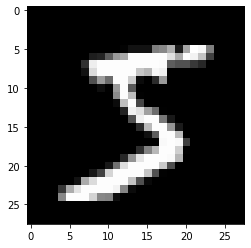

0번째 데이터 : 5


In [ ]:
from tensorflow.keras import datasets                             # 데이터셋 다운로드 함수
import matplotlib.pyplot as plt                                   # 이미지 표시용 라이브러리 

(x, y), (x_test, y_test) = datasets.mnist.load_data()             # keras에서 제공하는 데이터셋 불러오기

i = 0
plt.imshow(x[i], cmap='gray')                                     # i번째 데이터를 이미지로 보이기
plt.show()
print(f'{i}번째 데이터 : {y[i]}')


### 2. 전처리

In [ ]:
import numpy as np                                                # 빠른 배열 연산용 라이브러리
from keras.utils import np_utils                                  # 라벨데이터 전처리 함수

x = x.reshape(-1, 784) / 255                                      # x 학습 데이터 전처리 : 가로세로 28*28 픽셀을 일렬(784)로 재배치 후 0~1 범위로 스케일 노멀라이즈
x_test = x.reshape(-1, 784) / 255                                 # x 테스트 데이터 전처리
y = np_utils.to_categorical(y)                                    # y 학습 데이터 전처리 : 0~9 까지의 숫자를 각각의 값에 해당되는 벡터로 변환
y_test = np_utils.to_categorical(y_test)                          # y 테스트 데이터 전처리

### 3.  모델

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784,), name='hidden_1'))   # activation 은 출력값에 특정 함수를 거치게 하는 과정
model.add(Dense(50, activation='relu', name='hidden_2'))                        # relu는 출력값이 음수일 경우 0으로 바꾸어서 음수를 필터링
model.add(Dense(10, activation='softmax', name='output'))                       # softmax는 각 출력은 0~1 사이의 값을 가지며 전체합은 1이 되어서 출력이 확률처럼 보이게 만듦
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 100)               78500     
                                                                 
 hidden_2 (Dense)            (None, 50)                5050      
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


### 4. 학습

In [ ]:
history = model.fit(x, y, epochs=10, batch_size=54000, validation_split=0.1)
# batch_size : 그래픽카드에 한꺼번에 입력넣을 데이터의 개수, validation_split=0.1 : 10% 만큼은 검증 데이터셋으로 분리


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 2.3194 - accuracy: 0.1137 - val_loss: 2.2355 - val_accuracy: 0.1897
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 2.2417 - accuracy: 0.1796 - val_loss: 2.1624 - val_accuracy: 0.2785
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 2.1711 - accuracy: 0.2664 - val_loss: 2.0919 - val_accuracy: 0.3805
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.1031 - accuracy: 0.3518 - val_loss: 2.0207 - val_accuracy: 0.4645
Epoch 5/10
1/1 [==============================] - 1s 852ms/step - loss: 2.0346 - accuracy: 0.4345 - val_loss: 1.9466 - val_accuracy: 0.5402
Epoch 6/10
1/1 [==============================] - 1s 552ms/step - loss: 1.9634 - accuracy: 0.5094 - val_loss: 1.8684 - val_accuracy: 0.6023
Epoch 7/10
1/1 [==============================] - 1s 551ms/step - loss: 1.8886 - accuracy: 0.5689 - val_loss: 1.7860 - val_accuracy: 0.6455
Epoch 8/10
1/1 [================

### 5. 예측

예측값: 6


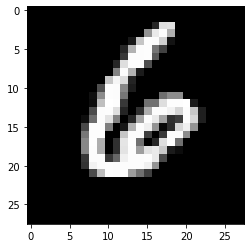

In [ ]:
i = 13
x_show = x.reshape(-1, 28, 28)            # 이미지 후처리
predict = model.predict(x)
y_show = np.argmax(predict[i])
print('예측값:', y_show)                  # 라벨값 후처리
plt.imshow(x_show[i], cmap='gray')
plt.show()
